<a href="https://colab.research.google.com/github/Ali-Khatib/Comparative-Sentiment-Analysis-Across-varying-datasets/blob/stanford-sst/stanford_sst_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import nltk
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
import warnings
import re
import os
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams




from textblob import TextBlob
warnings.filterwarnings("ignore")
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline, logging
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB


warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#nltk.down
#load('punkt_tab')
#nltk.download('averaged_perceptron_tagger_eng')
#nltk.download('all')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

lemmatizer = WordNetLemmatizer()

print("Imports are ready")

/kaggle/input/amazon-customerreviews-polarity/train.csv
/kaggle/input/amazon-customerreviews-polarity/test.csv
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/BERT-SST2-Dataset-Paper.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/Writing Code for NLP Research.pdf
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/README.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/sentlex_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/stanfordSentimentTreebankRaw/stanfordSentimentTreebankRaw/rawscores_exp12.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/test.txt
/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/train.txt
/kaggle/input/stanford-sentiment

In [ ]:
import nltk

nltk.data.path.append('/usr/share/nltk_data/')
nltk.data.path.append('/kaggle/input/nltkdata/')  # optional if you upload your own
nltk.download('averaged_perceptron_tagger_eng')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

print('all goood')

all goood


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
import pandas as pd

train_path = "/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/train.txt"
test_path = "/kaggle/input/stanford-sentiment-treebank-v2-sst2/SST2-Data/SST2-Data/trainDevTestTrees_PTB/trees/test.txt"

with open(train_path, 'r', encoding='utf-8') as f:
    train_lines = f.readlines()

with open(test_path, 'r', encoding='utf-8') as f:
    test_lines = f.readlines()


all_data = train_lines + test_lines


with open("merged_dataset.txt", "w", encoding='utf-8') as f:
    f.writelines(all_data)

print("✅ Successfully merged train and test datasets!")
print(f"Total lines in merged dataset: {len(all_data)}")




✅ Successfully merged train and test datasets!
Total lines in merged dataset: 10754


In [ ]:
import pandas as pd
import re


merged_path = "merged_dataset.txt"


with open(merged_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()


def parse_line(line):

    match = re.match(r"\((\d)\s*(.*)\)", line.strip())
    if match:
        label = int(match.group(1))
        text = re.sub(r"\(\d\s*|\)", "", match.group(2)).strip()
        return label, text
    else:
        return None, None


data = [parse_line(line) for line in lines]
df = pd.DataFrame(data, columns=["label", "text"])


print("✅ DataFrame created successfully!")
print(f"Total rows: {len(df)}\n")
print(df.head(), "\n")
print("📊 Data types:")
print(df.dtypes)


✅ DataFrame created successfully!
Total rows: 10754

   label                                               text
0      3  The Rock is destined to be the 21st Century 's...
1      4  The gorgeously elaborate continuation of `` Th...
2      3  Singer\/composer Bryan Adams contributes a sle...
3      2  You 'd think by now America would have had eno...
4      3               Yet the act is still charming here . 

📊 Data types:
label     int64
text     object
dtype: object


In [ ]:
df_clean=df.dropna().drop_duplicates()


df_clean.dtypes
df_clean['clean_text'] = df_clean['text'].str.lower()
df_clean['clean_text'] = df_clean['clean_text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df_clean['clean_text'] = df_clean['clean_text'].str.replace(r'\s+', ' ', regex=True).str.strip()

df_clean.head(2)
df_clean.dtypes

label          int64
text          object
clean_text    object
dtype: object

In [ ]:
df_clean['id']=df_clean.index
df.head()

,label,text
0,3,The Rock is destined to be the 21st Century 's...
1,4,The gorgeously elaborate continuation of `` Th...
2,3,Singer\/composer Bryan Adams contributes a sle...
3,2,You 'd think by now America would have had eno...
4,3,Yet the act is still charming here .


In [ ]:
print(df_clean.columns.tolist())


['label', 'text', 'clean_text', 'id']


In [ ]:

if 'text' in df_clean.columns:
    df_clean = df_clean.drop('text', axis=1)

print(df_clean.columns)


Index(['label', 'clean_text', 'id'], dtype='object')


In [ ]:
df_clean['tokens'] = df_clean['clean_text'].apply(word_tokenize)
df_clean['tokens'] = df_clean['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [ ]:
print("📈 DATASET OVERVIEW")
print("#" * 60)
print(f"Shape: {df_clean.shape}")
print(f"Columns: {df_clean.columns.tolist()}")
print(f"Sentiment distribution:\n{df_clean['label'].value_counts()}")

📈 DATASET OVERVIEW
############################################################
Shape: (10742, 4)
Columns: ['label', 'clean_text', 'id', 'tokens']
Sentiment distribution:
label
1    2847
3    2828
2    2012
4    1686
0    1369
Name: count, dtype: int64


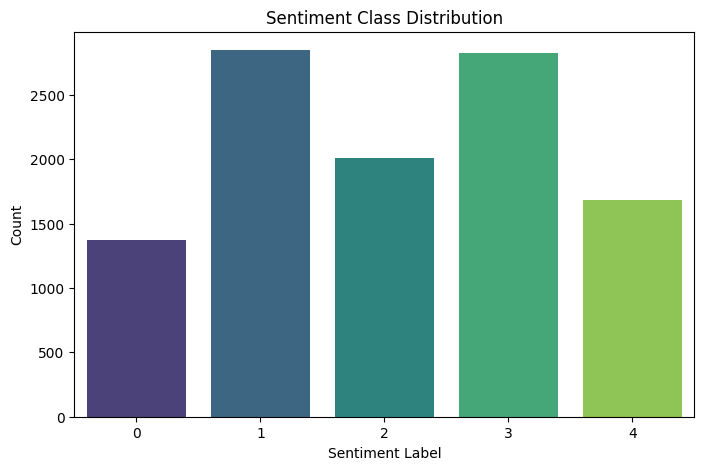

In [ ]:
plt.figure(figsize=(8,5))
sb.countplot(data=df_clean, x='label', palette='viridis')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

In [ ]:
df_clean['polarity']=df_clean['clean_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_clean['polarity'].head()

0    0.318182
1    0.244444
2    0.073469
3    0.000000
4    0.700000
Name: polarity, dtype: float64

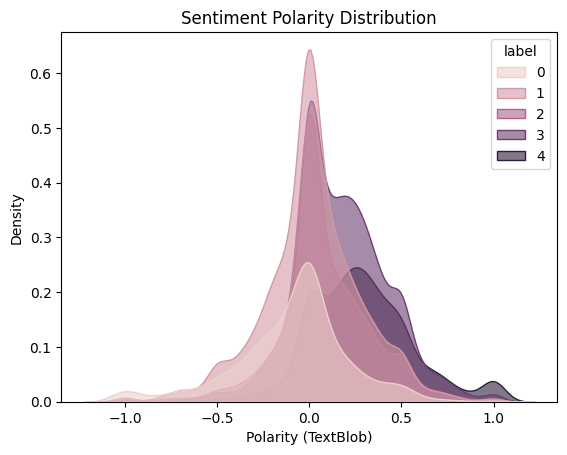

In [ ]:
sb.kdeplot(data=df_clean, x='polarity', hue='label', fill=True, alpha=0.6)
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity (TextBlob)")
plt.ylabel("Density")
plt.show()

The plot above shows how the sentiment polarity (positiveness or negativeness) is distributed across different sentiment labels in the dataset. Polarity is a numeric value that ranges from -1 to +1, where -1 represents very negative sentiment, 0 represents neutral, and +1 represents very positive sentiment. Each curve in the plot corresponds to a sentiment label, allowing us to see how TextBlob’s polarity scores align with the dataset’s actual labels. For example, texts labeled as negative are expected to appear more on the left (closer to -1), while positive ones should cluster toward the right (closer to +1). This visualization helps confirm whether the sentiment analysis tool’s polarity scores match the intended labeling of the data.

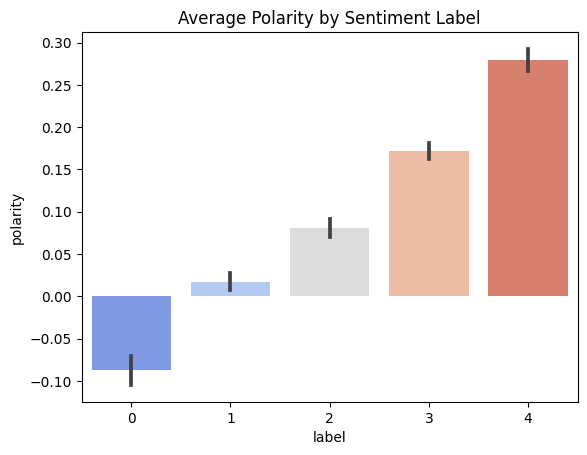

In [ ]:
sb.barplot(data=df_clean, x='label', y='polarity', palette='coolwarm', estimator='mean')
plt.title("Average Polarity by Sentiment Label")
plt.show()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


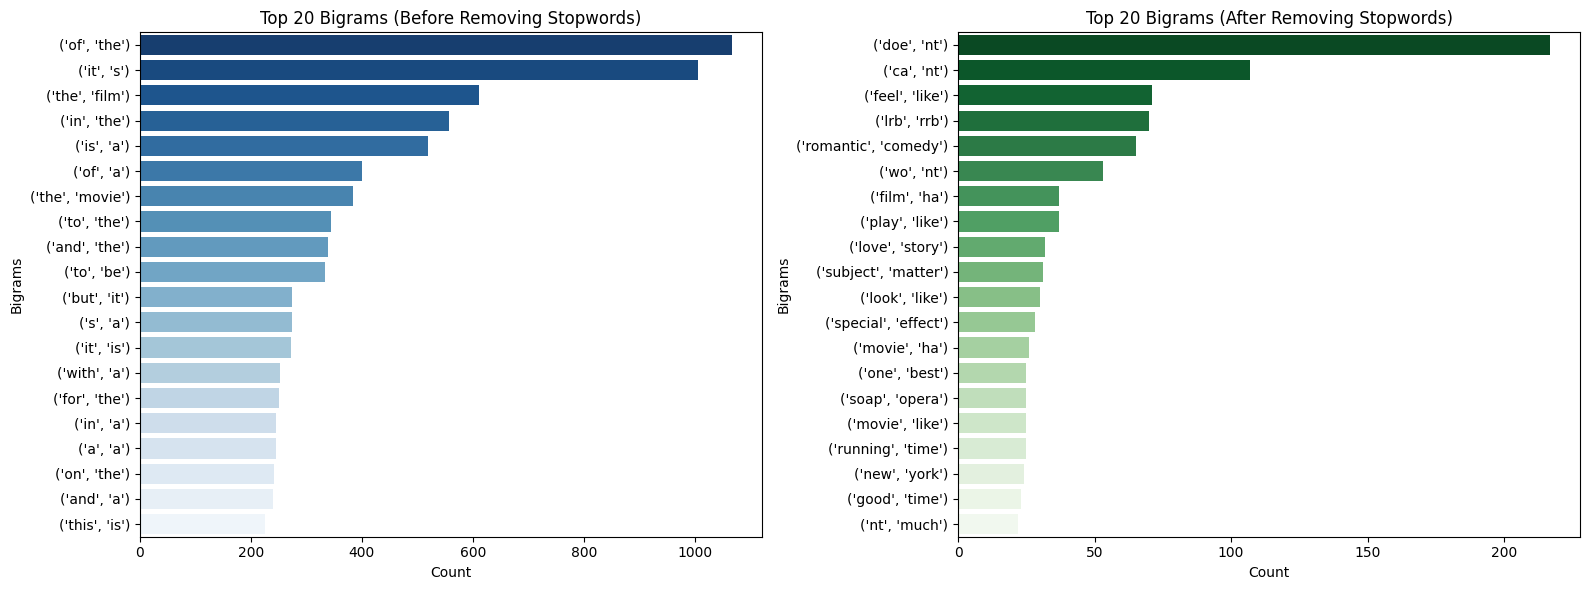

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))
bigrams_before = [b for tokens in df_clean['tokens'] for b in nltk.bigrams(tokens)]
bigrams_before_counts = Counter(bigrams_before).most_common(20)


bigrams_after = [
    b for tokens in df_clean['tokens'].apply(lambda t: [w for w in t if w not in stop_words])
    for b in nltk.bigrams(tokens)
]
bigrams_after_counts = Counter(bigrams_after).most_common(20)

# Convert to DataFrame for plotting
before_df = pd.DataFrame(bigrams_before_counts, columns=['bigram', 'count'])
after_df = pd.DataFrame(bigrams_after_counts, columns=['bigram', 'count'])


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sb.barplot(y=before_df['bigram'].astype(str), x='count', data=before_df, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 20 Bigrams (Before Removing Stopwords)")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Bigrams")

sb.barplot(y=after_df['bigram'].astype(str), x='count', data=after_df, ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 20 Bigrams (After Removing Stopwords)")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Bigrams")

plt.tight_layout()
plt.show()

# **VADER MODEL**

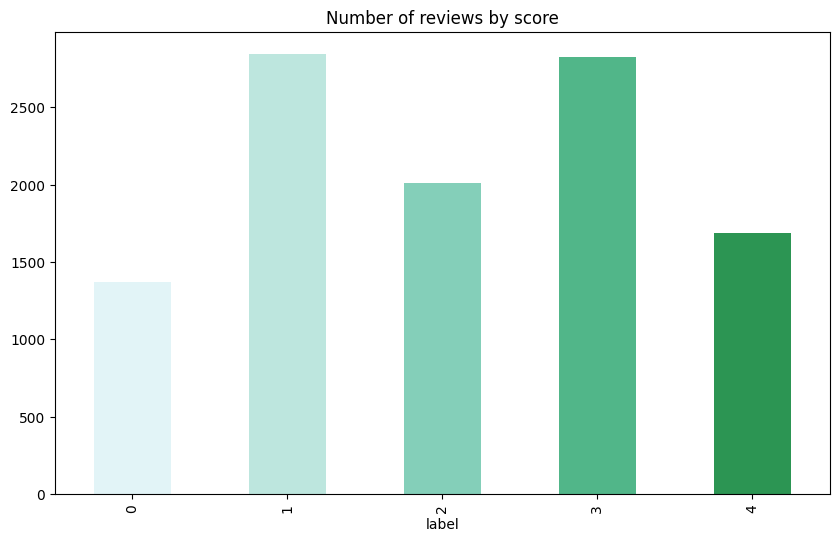

100%|██████████| 10742/10742 [00:02<00:00, 4436.31it/s]


   neg    neu    pos  compound  label  \
0  0.0  0.918  0.082    0.3612      3   
1  0.0  0.772  0.228    0.8069      4   
2  0.0  0.845  0.155    0.6310      3   
3  0.0  1.000  0.000    0.0000      2   
4  0.0  0.612  0.388    0.5859      3   

                                          clean_text  id  \
0  the rock is destined to be the st century s ne...   0   
1  the gorgeously elaborate continuation of the l...   1   
2  singercomposer bryan adams contributes a slew ...   2   
3  you d think by now america would have had enou...   3   
4                 yet the act is still charming here   4   

                                              tokens  polarity  
0  [the, rock, is, destined, to, be, the, st, cen...  0.318182  
1  [the, gorgeously, elaborate, continuation, of,...  0.244444  
2  [singercomposer, bryan, adam, contributes, a, ...  0.073469  
3  [you, d, think, by, now, america, would, have,...  0.000000  
4         [yet, the, act, is, still, charming, here]  0.700000  


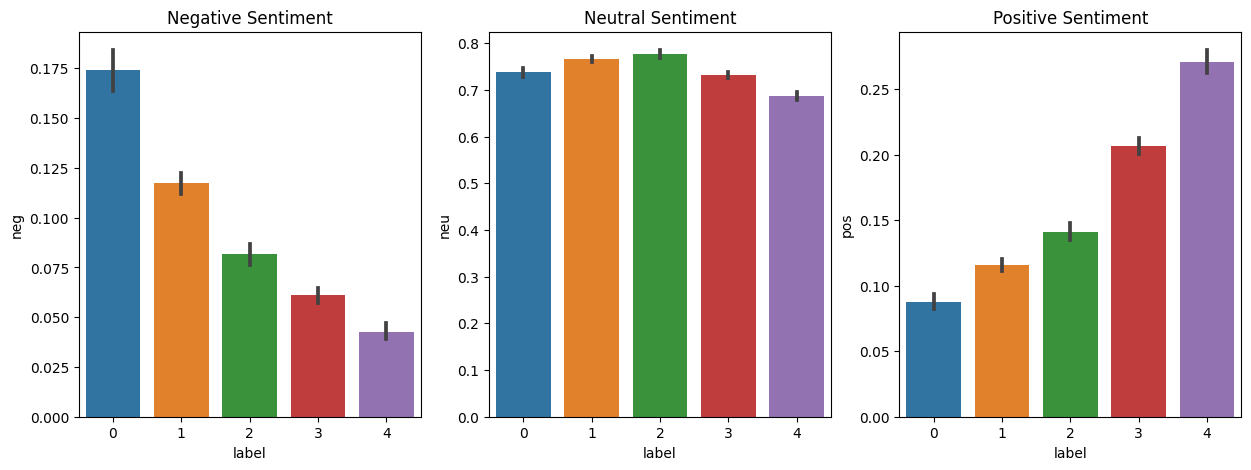

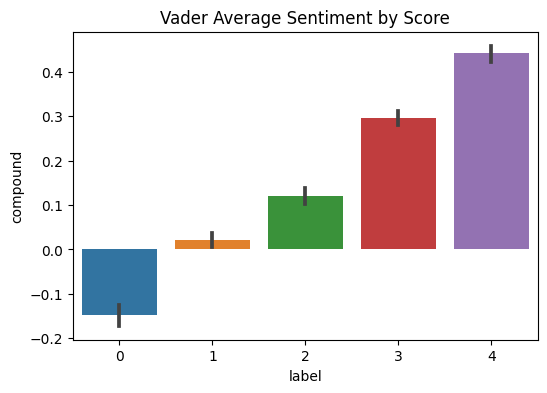

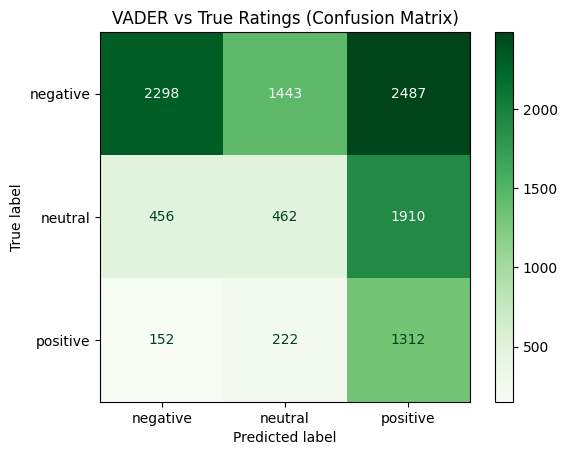

In [ ]:
ax=df_clean['label'].value_counts().sort_index().plot(
    kind='bar',
    title='Number of reviews by score',
    figsize=(10, 6),
    color=sns.color_palette('BuGn'))

ax.set_xlabel('label')
plt.show()


sia=SentimentIntensityAnalyzer()


results={}
for i, row in tqdm(df_clean.iterrows(), total=len(df_clean)):
    clean_text=row['clean_text']
    id=row['id']
    results[id]=sia.polarity_scores(clean_text)

vaders=pd.DataFrame(results).T
vaders=vaders.merge(df_clean, left_index=True, right_on='id')
print(vaders.head())

fig, axs=plt.subplots(1,3, figsize=(15, 5))
sns.barplot(x='label', y='neg', data=vaders, ax=axs[0])
sns.barplot(x='label', y='neu', data=vaders, ax=axs[1])
sns.barplot(x='label', y='pos', data=vaders, ax=axs[2])

axs[0].set_title('Negative Sentiment')
axs[1].set_title('Neutral Sentiment')
axs[2].set_title('Positive Sentiment')

#Display the average compound sentiment for each score

plt.figure(figsize=(6, 4))
sns.barplot(x='label', y='compound', data=vaders)
plt.title('Vader Average Sentiment by Score')
plt.show()

def vader_label(compound): #Vader doesnt give a name , it gives a number, we want to map it on our own
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

vaders["predicted_sentiment"] = vaders["compound"].apply(vader_label)

def map_score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

vaders["true_sentiment"] = vaders["label"].apply(map_score_to_sentiment)

cm = confusion_matrix(
    vaders["true_sentiment"],
    vaders["predicted_sentiment"],
    labels=["negative", "neutral", "positive"]
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])

disp.plot(cmap="Greens", values_format="d")
plt.title("VADER vs True Ratings (Confusion Matrix)")
plt.show()

⚠️  Warning: 'huggingface-cli download' is deprecated. Use 'hf download' instead.
Fetching 11 files: 100%|██████████████████████| 11/11 [00:00<00:00, 2940.74it/s]
/kaggle/working/roberta_local


Some weights of the model checkpoint at ./roberta_local were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0
100%|██████████| 157/157 [02:37<00:00,  1.00s/it]


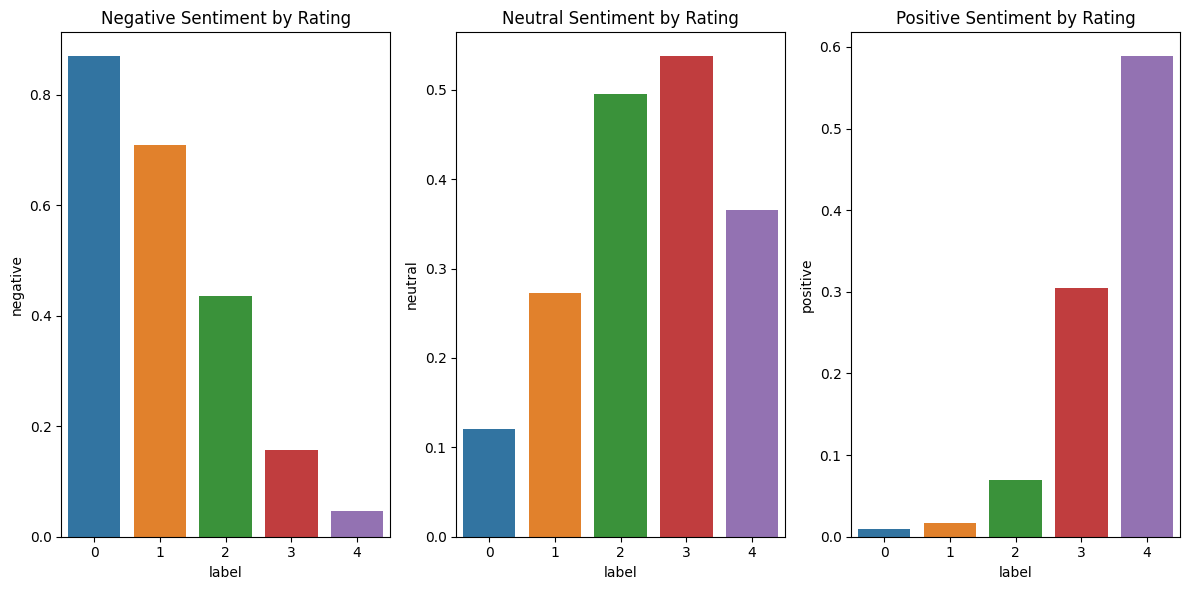

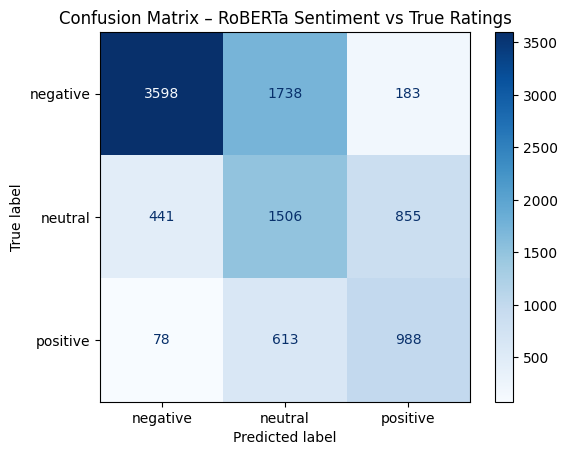

In [ ]:



!huggingface-cli download j-hartmann/sentiment-roberta-large-english-3-classes \
    --local-dir ./roberta_local \
    --repo-type model --resume-download

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
import torch


MODEL_DIR = "./roberta_local"

tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR, local_files_only=True)

device = 0 if torch.cuda.is_available() else -1

classifier = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    device=device,
    return_all_scores=False
)


subset = df_clean.head(10000).copy()

texts = subset['clean_text'].str.slice(0, 500).tolist()

batch_size = 64
sentiments = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    preds = classifier(batch)
    sentiments.extend([p['label'] for p in preds])

subset['sentiment'] = sentiments
subset[['id', 'clean_text', 'sentiment']].head()


bertas = (
    subset.groupby("label")["sentiment"]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
)

bertas = bertas[['negative', 'neutral', 'positive']].reset_index()


fig, axs = plt.subplots(1,3, figsize=(12,6))

sns.barplot(x='label', y='negative', data=bertas, ax=axs[0])
sns.barplot(x='label', y='neutral', data=bertas, ax=axs[1])
sns.barplot(x='label', y='positive', data=bertas, ax=axs[2])

axs[0].set_title('Negative Sentiment by Rating')
axs[1].set_title('Neutral Sentiment by Rating')
axs[2].set_title('Positive Sentiment by Rating')

plt.tight_layout()
plt.show()



def map_score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

subset["true_sentiment"] = subset["label"].apply(map_score_to_sentiment)



cm = confusion_matrix(
    subset["true_sentiment"],
    subset["sentiment"],
    labels=["negative", "neutral", "positive"]
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – RoBERTa Sentiment vs True Ratings")
plt.show()


In [ ]:

pattern=r"[a-zA-Z]+"

vect=TfidfVectorizer(
    token_pattern=pattern,
    stop_words='english',
    ngram_range=(1,2),
    max_features=500
)

vect.fit(df["text"])

tokenized_features=vect.transform(df["text"])

features=pd.DataFrame(data=tokenized_features.toarray(),
                     columns=vect.get_feature_names_out()
                     )


X = vect.transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



In [ ]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3505346350534635

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.11      0.16       266
           1       0.35      0.52      0.42       566
           2       0.24      0.11      0.15       394
           3       0.37      0.49      0.42       586
           4       0.38      0.30      0.34       339

    accuracy                           0.35      2151
   macro avg       0.32      0.31      0.30      2151
weighted avg       0.33      0.35      0.33      2151



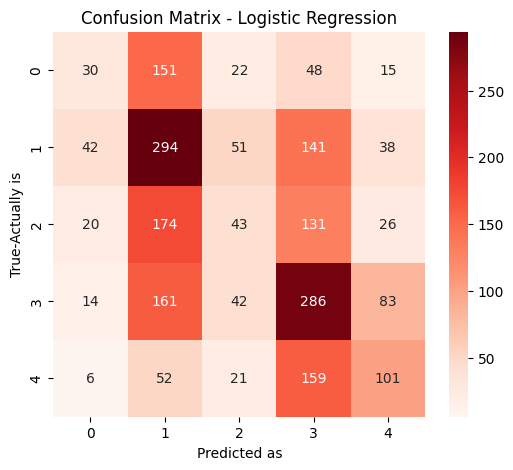

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted as")
plt.ylabel("True-Actually is")
plt.show()

In [ ]:

nb_classifier=MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb =nb_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 5))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
disp_nb.plot(cmap='Purples', values_format='d', ax=plt.gca())

plt.title("Confusion Matrix - Naive Bayes Model", fontsize=14)
plt.show()

# 1D CNN MODEL

**Loading Ebeddings**

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['clean_text'])

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

print("Vocab size:", vocab_size)

max_len = 200
sequences = tokenizer.texts_to_sequences(df_clean['clean_text'])
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post")

embedding_dim = 100
glove_path = "/kaggle/input/glove6b100dtxt/glove.6B.100d.txt"

embeddings_index = {}

with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

print("Loaded word vectors:", len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
    vector = embeddings_index.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector


X = X_padded
y = df_clean["label"].values  # 5-class labels: 0,1,2,3,4

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Vocab size: 18262
Loaded word vectors: 400000
Train shape: (8593, 200)
Test shape: (2149, 200)


**Building and Training the Model**

In [ ]:
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False  # USE GloVe!
    ),

    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),

    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),

    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(5, activation='softmax')
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(1e-3),
    metrics=["accuracy"]
)

I0000 00:00:1765132157.540374      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11192 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765132157.541068      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=128,
    verbose=1
)


Epoch 1/6


I0000 00:00:1765132202.283228     178 service.cc:148] XLA service 0x7bae18006150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765132202.283712     178 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765132202.283732     178 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765132202.573478     178 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-12-07 18:30:05.560879: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=2} for conv (f32[128,256,1,98]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,128,1,94]{3,2,1,0}, f32[128,256,1,5]{3,2,1,0}), window={size=1x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":

18/61 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2122 - loss: 1.7054

I0000 00:00:1765132208.018347     178 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.2382 - loss: 1.6410 - val_accuracy: 0.3500 - val_loss: 1.5458
Epoch 2/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3106 - loss: 1.5397 - val_accuracy: 0.3570 - val_loss: 1.4478
Epoch 3/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3765 - loss: 1.4240 - val_accuracy: 0.3686 - val_loss: 1.4332
Epoch 4/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4039 - loss: 1.3683 - val_accuracy: 0.3860 - val_loss: 1.3867
Epoch 5/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4437 - loss: 1.2959 - val_accuracy: 0.4081 - val_loss: 1.3819
Epoch 6/6
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4519 - loss: 1.2392 - val_accuracy: 0.4128 - val_loss: 1.3946


In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(model.predict(X_test), axis=1)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0     0.6500    0.0949    0.1656       274
           1     0.3749    0.7965    0.5098       570
           2     0.2714    0.0473    0.0805       402
           3     0.4211    0.4947    0.4549       566
           4     0.5951    0.2878    0.3880       337

    accuracy                         0.4076      2149
   macro avg     0.4625    0.3442    0.3198      2149
weighted avg     0.4373    0.4076    0.3521      2149



<Figure size 700x600 with 0 Axes>

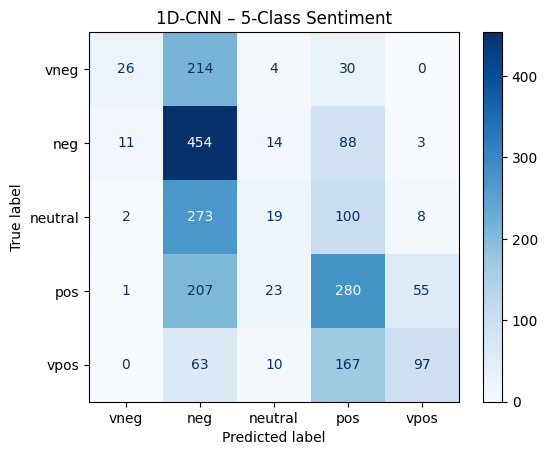

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["vneg", "neg", "neutral", "pos", "vpos"]
)
disp.plot(cmap="Blues", values_format="d")
plt.title("1D-CNN – 5-Class Sentiment")
plt.show()